# **Library Book Recommendation System**
---
Authors: [Monicah Iwagit](https://github.com/Okodoimonicah), [Bradley Azegele](https://github.com/Azegele), [Emmanuel Kipkorir](), [Belinda Nyamai](), [Femi Kamau](https://github.com/ctrl-Karugu), and [Dennis Kimiri]()

## 1. Business Understanding

### 1.1 Problem Statement
>The tremendous growth and usage of information has led to information overloading where users find it difficult to locate the right information at a specified time. Although there are previous studies conducted on library recommender systems, the datasets used were small compared to the dataset we intend to use hence minimal area coverage. Recommending the right library books is a challenge due to the variety of genres available and the huge collection of books provided. A user finds it difficult to select the most appropriate book that will suit their academic needs, this process consumes a lot of time that the user would have used to sharpen on their desired skills. Additionally, many books in the library are rarely utilized which results in a waste of library resources. Having a personalized recommendation system seeks to predict the preference based on the user’s interest, behavior and information. The application of recommender systems in the university library solves the problem of difficulty in choosing books and improves utilization rate of library resources. 

## 2. Data Understanding
> The goal of the Data Understanding phase is to provide a solid foundation for the subsequent steps, including data preparation, exploratory data analysis, model development, and evaluation.

#### Load Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### 2.1 Collect Initial Data
> The goal of this section is to acquire the necessary data and load it into the notebook.

> The data used in this project was sourced from 2 different sources:
>   1. The first was source was from Cai-Nicolas Ziegler in a 4-week crawl (August-September [2004]) in the University of Freiburg, Germany. This can be found [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). The data obtained are 3 datasets with information on [users](./data/BX-Users.csv), [ratings](./data/BX-Book-Ratings.csv) and [books](./data/BX-Books.csv) from a library.
>
>   2. The second set of data was sourced from the [Google Books API](https://developers.google.com/books). This data was obtained by using ISBNs in the books dataset from the first source. The script used to extract the data can be found [here](./make_dataset.py). This data was then stored in csv format and can be found [here](./data/books.csv).

#### Load Data

In [2]:
# (Source 1)
ratings = pd.read_csv("data/BX-Book-Ratings.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books = pd.read_csv("data/BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
users = pd.read_csv("data/BX-Users.csv", sep=";", error_bad_lines=False, encoding="latin-1")

# (Source 2)
books_extra = pd.read_csv("data/books.csv", encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### 2.2 Describe Data
> The goal of this section is to examine the data and document its surface properties.

In [3]:
# Define class to describe the data 
class DescribeData():
    """This class is used to describe the data in a DataFrame."""
    
    def __init__(self, df) -> None:
        
        # Get the DataFrame
        self.df = df
        
        # Get the datatypes of the columns in the DataFrame
        self.datatypes = df.dtypes
         
        # Get the shape of the DataFrame
        self.shape = f"The shape of the DataFrame is {df.shape}\n\nRecords: {df.shape[0]}\nColumns: {df.shape[1]}"
        
        # Get the number of missing values in each column
        self.missing = f"There are a total of {df.isnull().sum().values.sum()} missing values in the DataFrame.\n\n{df.isnull().sum()}"
        
        # Get the number of duplicate rows
        self.duplicates = f"There are {df.duplicated().sum()} duplicated records in the DataFrame."

#### 2.2.1 `ratings`

In [4]:
# Create an instance of the 'DescribeData' class for the 'ratings' DataFrame
rt = DescribeData(ratings)

In [5]:
# Preview the 'ratings' DataFrame
rt.df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Inspect the information about the DataFrame
rt.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
# Inspect the shape of the DataFrame
print(rt.shape)

The shape of the DataFrame is (1149780, 3)

Records: 1149780
Columns: 3


In [8]:
# Inspect the datatypes of the columns in the DataFrame
print(rt.datatypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [9]:
# Inspect the summary statistics of the DataFrame
rt.df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [10]:
# Inspect the number of missing values in each column
print(rt.missing)

There are a total of 0 missing values in the DataFrame.

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [11]:
# Inspect the duplicates in the DataFrame
print(rt.duplicates)

There are 0 duplicated records in the DataFrame.


[**Ratings Dataset**](./data/BX-Book-Ratings.csv)

>* Spans **3** columns and **1,149,780** rows.

>* Contains **2** unique datatypes: 
>    * **int64**
>    * **object**

>* Has no missing values

>* Has no duplicates

#### 2.2.2 `books` 

In [12]:
# Instantiate the 'DescribeData' class for the 'books' DataFrame
bk = DescribeData(books)

In [13]:
# Preview the 'books' DataFrame
bk.df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [14]:
# Inspect the information about the DataFrame
bk.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
# Inspect the shape of the DataFrame
print(bk.shape)

The shape of the DataFrame is (271360, 8)

Records: 271360
Columns: 8


In [16]:
# Inspect the datatypes of the columns in the DataFrame
print(bk.datatypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [17]:
# Inspect the missing values in the DataFrame
print(bk.missing)

There are a total of 6 missing values in the DataFrame.

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [18]:
# Inspect the duplicates in the DataFrame
print(bk.duplicates)

There are 0 duplicated records in the DataFrame.


[**Books Dataset**](./data/BX-Books.csv)

>* Spans **8** columns and **271,359** rows.

>* Contains 1 unique datatype: 
>   * **object**

>* Has **6** missing values:
>   * Book-Author: **1** 
>   * Publisher: **2**
>   * Image-URL-L: **3**

>* Has no duplicates

#### 2.2.3 `users` 

In [19]:
# Instantiate the 'DescribeData' class for the 'users' DataFrame
ur = DescribeData(users)

In [20]:
# Preview the 'users' DataFrame
ur.df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
# Inspect the information about the DataFrame
ur.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
# Inspect the shape of the DataFrame
print(ur.shape)

The shape of the DataFrame is (278858, 3)

Records: 278858
Columns: 3


In [23]:
# Inspect the datatypes of the columns in the DataFrame
print(ur.datatypes)

User-ID       int64
Location     object
Age         float64
dtype: object


In [24]:
# Inspect the summary statistics of the DataFrame
ur.df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [25]:
# Inspect the missing values in the DataFrame
print(ur.missing)

There are a total of 110762 missing values in the DataFrame.

User-ID          0
Location         0
Age         110762
dtype: int64


In [26]:
# Inspect the duplicates in the DataFrame
print(ur.duplicates)

There are 0 duplicated records in the DataFrame.


[**Users Dataset**](./data/BX-Users.csv)

>* Spans **3** columns and **278,857** rows.

>* Contains **3** unique datatypes:
>   * **int64**
>   * **float64**
>   * **object**

>* Has **110762** missing values:
>   * Age: **110,762**

>* Has no duplicates

#### 2.2.4 `books_extra`

In [27]:
# Instantiate the 'DescribeData' class for the 'books_extra' DataFrame
bk_extra = DescribeData(books_extra)

In [28]:
# Preview the 'books_extra' DataFrame
bk_extra.df.head()

,authors,published_date,description,isbn_10,isbn_13,page_count,categories,maturity_rating,language,join_isbn_10
0,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",0195153448,9780195153446.0,808.0,['Social Science'],NOT_MATURE,en,0195153448
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0002005018
2,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",IND:30000026059836,NaN,582.0,['1940-1949'],NOT_MATURE,en,0060973129
3,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",9780374157067,374157065.0,367.0,['Medical'],NOT_MATURE,en,0374157065
4,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",0393045218,9780393045215.0,240.0,['Design'],NOT_MATURE,en,0393045218


In [29]:
# Inspect the information about the DataFrame
bk_extra.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266401 entries, 0 to 266400
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   authors          200900 non-null  object 
 1   published_date   202728 non-null  object 
 2   description      171784 non-null  object 
 3   isbn_10          202788 non-null  object 
 4   isbn_13          171364 non-null  object 
 5   page_count       201597 non-null  float64
 6   categories       189620 non-null  object 
 7   maturity_rating  202848 non-null  object 
 8   language         202848 non-null  object 
 9   join_isbn_10     266400 non-null  object 
dtypes: float64(1), object(9)
memory usage: 20.3+ MB


In [30]:
# Inspect the shape of the DataFrame
print(bk_extra.shape)

The shape of the DataFrame is (266401, 10)

Records: 266401
Columns: 10


In [31]:
# Inspect the datatypes of the columns in the DataFrame
print(bk_extra.datatypes)

authors             object
published_date      object
description         object
isbn_10             object
isbn_13             object
page_count         float64
categories          object
maturity_rating     object
language            object
join_isbn_10        object
dtype: object


In [32]:
# Inspect the summary statistics of the DataFrame
bk_extra.df.describe()

,page_count
count,201597.000000
mean,279.266581
std,179.229782
min,0.000000
25%,176.000000
50%,260.000000
75%,356.000000
max,3596.000000


In [33]:
# Inspect the missing values in the DataFrame
print(bk_extra.missing)

There are a total of 651133 missing values in the DataFrame.

authors            65501
published_date     63673
description        94617
isbn_10            63613
isbn_13            95037
page_count         64804
categories         76781
maturity_rating    63553
language           63553
join_isbn_10           1
dtype: int64


In [34]:
# Inspect the duplicates in the DataFrame
print(bk_extra.duplicates)

There are 0 duplicated records in the DataFrame.


[**Books (Extra) Dataset**](./data/books.csv)

>* Spans **10** columns and **()** rows.

>* Contains **2** unique datatypes:
>   * **float64**
>   * **object**

>* Has **()** missing values:

>* Has no duplicates

## 3. Data Preparation
> This is the process of identifying and correcting or removing incorrect, incomplete, or improperly formatted data in a dataset. It mainly involves handling missing values, fixing incorrect data, removing duplicates, normalizing data and handling outliers.

### Users Dataset

The location column has city, state and country separated by commas. We segregate these into 3 different columns so that we can analyse on the basis of the country of different users.

In [35]:
#splitting a string into a list
list_ = users.Location.str.split(', ')

#empty lists to add values  
city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0
#generating a for loop to add values to the empty lists
for i in range(0,len(list_)):
    #removing invalid entries in city
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        #removing invalid entries in state
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            #removing invalid entries in country
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
#dropping the location column from users             
users = users.drop('Location',axis=1)

#handling cases where city/state from the lists is already given
temp = []
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])
    
#creating a dataframe for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#adding the new dataframes to the original users dataframe 
users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

#printing the number of countries that do not have values 
print(count_no_country)

#printing the states which didnt have any values
print(count_no_state)     

4659
16044


In [36]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [37]:
#confirming that the new dataframes have been added to users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   City     278858 non-null  object 
 3   State    278858 non-null  object 
 4   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [38]:
users.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [39]:
# checking for null values
users['Age'].isnull().sum()

110762

#### Dealing with missing values in the Age column

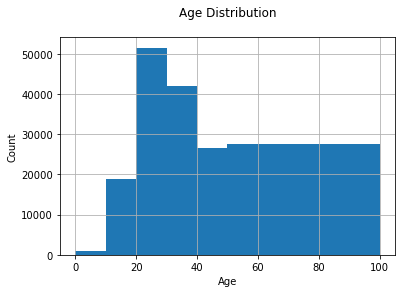

In [40]:
#checking the Age distribution
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are in the age bracket between 20 to 30 years.

Text(0.5, 1.0, 'Outliers present in the Age column')

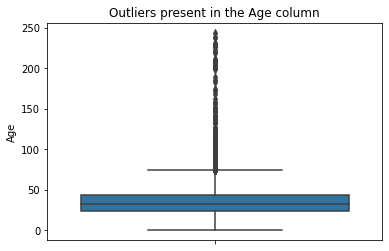

In [41]:
#checking for outliers in the age column using a boxplot
sns.boxplot(y='Age', data=users)
plt.title('Outliers present in the Age column')

Looking at the distribution plot the age is skewed to the right and has outliers. Replacing the missing age values and values less than 10 and greater than 80 with the median will be the robust approach since it's not sensitive to extreme values compared to using the mean.

In [42]:
#checking all values present in the Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Age Distribution Plot')

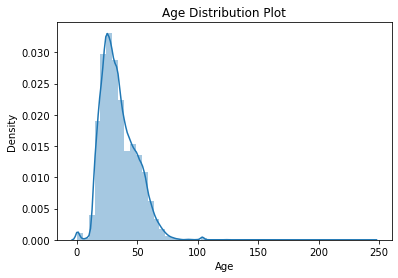

In [43]:
#plotting a distribution plot to discover the relevant age bracket 
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Evidently, users with ages less than 10 and above 80 are not an appropriate target for our book recommendation system since we assume they will not be able to access a library or use the recommendation system.

In [44]:
# Select rows where the age column is greater than 10 and less than 80
users_filtered = users[(users['Age'] >= 10) & (users['Age'] <= 80)]

In [45]:
# calculating the median for the required ages
median = users_filtered['Age'].median()
median

32.0

In [46]:
# Replace the entries less than 10 or greater than 80 with the median
users.loc[(users['Age'] < 10) | (users['Age'] > 80), 'Age'] = median

In [47]:
# Replace missing values in the "age" column with the median age
users['Age'] = users['Age'].fillna(median)

In [48]:
# convert the age column to int
users['Age'] = pd.to_numeric(users['Age'], downcast='integer')

In [49]:
print(sorted(list(users['Age'].unique())))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [50]:
#confirming that the missing values have been dealt with
users.isna().sum()

User-ID    0
Age        0
City       0
State      0
Country    0
dtype: int64

In [51]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int8  
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(1), int8(1), object(3)
memory usage: 8.8+ MB


### Books Dataset

In [52]:
#merge books dataset to books_extra
upgrade = books.merge(books_extra, right_on = 'join_isbn_10', left_on = 'ISBN', how = 'inner')

In [53]:
#Instantiate the 'DescribeData' class for the merged dataset
up_grad = DescribeData(upgrade)

In [54]:
up_grad.df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,authors,published_date,description,isbn_10,isbn_13,page_count,categories,maturity_rating,language,join_isbn_10
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",0195153448,9780195153446.0,808.0,['Social Science'],NOT_MATURE,en,0195153448
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0002005018
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",IND:30000026059836,NaN,582.0,['1940-1949'],NOT_MATURE,en,0060973129
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",9780374157067,374157065.0,367.0,['Medical'],NOT_MATURE,en,0374157065
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",0393045218,9780393045215.0,240.0,['Design'],NOT_MATURE,en,0393045218


In [55]:
up_grad.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259172 entries, 0 to 259171
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 259172 non-null  object 
 1   Book-Title           259172 non-null  object 
 2   Book-Author          259171 non-null  object 
 3   Year-Of-Publication  259172 non-null  object 
 4   Publisher            259170 non-null  object 
 5   Image-URL-S          259172 non-null  object 
 6   Image-URL-M          259172 non-null  object 
 7   Image-URL-L          259169 non-null  object 
 8   authors              200899 non-null  object 
 9   published_date       202727 non-null  object 
 10  description          171783 non-null  object 
 11  isbn_10              202788 non-null  object 
 12  isbn_13              171364 non-null  object 
 13  page_count           201597 non-null  float64
 14  categories           189620 non-null  object 
 15  maturity_rating  

In [56]:
print(up_grad.missing)

There are a total of 586080 missing values in the DataFrame.

ISBN                       0
Book-Title                 0
Book-Author                1
Year-Of-Publication        0
Publisher                  2
Image-URL-S                0
Image-URL-M                0
Image-URL-L                3
authors                58273
published_date         56445
description            87389
isbn_10                56384
isbn_13                87808
page_count             57575
categories             69552
maturity_rating        56324
language               56324
join_isbn_10               0
dtype: int64


In [57]:
# define class for data cleaning
class DataCleaning:
    def __init__(self, data):
        self.data = data
        
    def drop_null_rows(self):
        """Drops rows with null values."""
        self.data = self.data.dropna()
        return self.data

    def drop_duplicate_rows(self):
        """Drops duplicate rows."""
        self.data = self.data.drop_duplicates()
        return self.data

    def handle_missing_values(self, column, method, value=None):
        """Handles missing values in a specified column.
        
        The method parameter take one of the following:
        "drop": Drops rows with missing values in the specified column.
        "fill": Fills missing values with the specified value.
        "interpolate": Interpolates missing values using linear interpolation.
        """
        if method == "drop":
            self.data = self.data.dropna(subset=[column])
        elif method == "fill":
            self.data[column] = self.data[column].fillna(value)
        elif method == "interpolate":
            self.data[column] = self.data[column].interpolate()
        else:
            raise ValueError("Invalid value for method parameter. Valid values are 'drop', 'fill', and 'interpolate'.")
        return self.data

    def convert_column_data_type(self, column, data_type):
        """Converts the data type of a specified column."""
        self.data[column] = self.data[column].astype(data_type)
        return self.data

In [58]:
#Instantiate the 'datacleaning' class for the merged dataset
data_cleaning = DataCleaning(upgrade)

In [59]:
#dropping rows with null values in the description column
upgrade = data_cleaning.handle_missing_values(column="description", method="drop")
upgrade.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,authors,published_date,description,isbn_10,isbn_13,page_count,categories,maturity_rating,language,join_isbn_10
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",0195153448,9780195153446.0,808.0,['Social Science'],NOT_MATURE,en,0195153448
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",IND:30000026059836,NaN,582.0,['1940-1949'],NOT_MATURE,en,0060973129
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",9780374157067,374157065.0,367.0,['Medical'],NOT_MATURE,en,0374157065
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",0393045218,9780393045215.0,240.0,['Design'],NOT_MATURE,en,0393045218
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg,['Amy Tan'],1991,"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",0399135782,9780399135781.0,428.0,['Fiction'],NOT_MATURE,en,0399135782


All entries with no description are dropped because it is a critical feature that will be used in our recommendation system.

In [60]:
#dropping unwanted columns from the merged dataset
published = upgrade.drop(['Image-URL-L', 'Image-URL-M','isbn_10', 'isbn_13','join_isbn_10'], axis=1)
published

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808.0,['Social Science'],NOT_MATURE,en
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582.0,['1940-1949'],NOT_MATURE,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",367.0,['Medical'],NOT_MATURE,en
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",240.0,['Design'],NOT_MATURE,en
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,['Amy Tan'],1991,"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",428.0,['Fiction'],NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259166,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.01.THUMBZZZ.jpg,"['Robin B. Wright', 'Doyle McManus']",1992-12-22,"From two of America's most accomplished journalists comes a bold, provocative vision of a new world of violent upheavals and great opportunity. Drawing on their reporting experience from more than 70 countries and 14 wars, Wright and McManus investigate the radical changes engulfing the globe--and what they mean for the future.",276.0,['Political Science'],NOT_MATURE,en
259167,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,['Paula Danziger'],1988,"On her own for the first time, fourteen-year-old Marcy tries to cope with the new people and situations she encounters while working as a counselor at an arts camp.",16.0,['Adolescence'],NOT_MATURE,en
259169,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,['Christine Wicker'],2004-04,An award-winning and wry journalist captures the life and spirit of a 122-year-old town populated exclusively by people who believe the dead live among them.,300.0,['History'],NOT_MATURE,en
259170,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,['Plato'],1993,"The ce

In [61]:
#checking for missing values after dropping unwanted columns
published.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 1
Image-URL-S               0
authors                1365
published_date           19
description               0
page_count              490
categories             3842
maturity_rating           0
language                  0
dtype: int64

In [62]:
#checking the years of publication
published['Year-Of-Publication']=published['Year-Of-Publication'].astype('str')
p=(published['Year-Of-Publication'].unique())
#creating a set object to ensure years appear in a random order
p=set(p)
#creating a list object to ensure years are ordered and changeable
p=list(p)
p = [x for x in p if x is not None]
#sort to specify the order in which the years will be displayed
p.sort()
print(p)

['0', '1378', '1901', '1902', '1909', '1910', '1911', '1914', '1920', '1921', '1923', '1924', '1925', '1927', '1929', '1930', '1931', '1932', '1933', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2030', '2038', 'DK Publishing Inc', 'Gallimard']


In [63]:
published.loc[published['Year-Of-Publication'] == '0',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
502,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.01.THUMBZZZ.jpg,['Paulo Coelho'],1996,"Pilar ritrova a Madrid l'amico dell'infanzia. Questi ha girato il mondo ed ÃÂ¨ poi entrato in seminario, dove si dice abbia fatto miracoli. Pilar ÃÂ¨ una donna passionale, ma delusa dalla vita. Con l'amico d'infanzia compie un viaggio di sei giorni durante il quale la donna ritrova se stessa attraverso una riflessione mistico-iniziatica. I due si recano a Lourdes dove cementeranno il loro amore alla luce di una fede che esalta i valori della missione nel mondo.",216.0,['Fiction'],NOT_MATURE,it
606,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc,http://images.amazon.com/images/P/0590021117.01.THUMBZZZ.jpg,['Laura Ingalls Wilder'],1953,"A family travels from the big woods of Wisconsin, to a new home on the praire, where they build a house, meet neighboring Indians, build a well, and fight a praire fire.",221.0,['Families'],NOT_MATURE,en
688,2070362388,Ravage,Rene Barjavel,0,Gallimard French,http://images.amazon.com/images/P/2070362388.01.THUMBZZZ.jpg,['RenÃÂ© Barjavel'],1972,"De l'autre cÃÂ´tÃÂ© de la Seine une coulÃÂ©e de quintessence enflammÃÂ©e atteint, dans les sous-sols de la caserne de Chaillot, ancien TrocadÃÂ©ro, le dÃÂ©pÃÂ´t de munitions et le laboratoire de recherches des poudres. Une formidable explosion entrouvre la colline. Des pans de murs, des colonnes, des rochers, des tonnes de dÃÂ©bris montent au-dessus du fleuve, retombent sur la foule agenouillÃÂ©e qui rÃÂ¢le son adoration et sa peur fendent les crÃÂ¢nes, arrachent les membres, brisent les os. Un ÃÂ©norme bloc de terre et de ciment aplatit d'un seul coup la moitiÃÂ© des fidÃÂ¨les de la paroisse du Gros-Caillou. En haut de la Tour, un jet de flammes arrache l'ostensoir des mains du prÃÂªtre ÃÂ©pouvantÃÂ©.",313.0,['Fiction'],NOT_MATURE,fr
692,2266033689,Le Diable Au Corps,Raymond Radiguet,0,Presses Pocket French,http://images.amazon.com/images/P/2266033689.01.THUMBZZZ.jpg,['Raymond Radiguet'],1990,"Pendant la premiÃÂ¨re guerre mondiale, FranÃÂ§ois, un lycÃÂ©en, fait la connaissance de Marthe, une jeune femme de dix-huit ans. Celle-ci est fiancÃÂ©e ÃÂ Jacques, un soldat qui se bat sur le front. Au mÃÂ©pris des commÃÂ©rages, FranÃÂ§ois et Marthe vont devenir amants. Mais FranÃÂ§ois n'est-il pas trop jeune pour s'engager dans une telle liaison ?",206.0,NaN,NOT_MATURE,fr
757,0718144538,Shattered Uk,Dick Francis,0,Michael Joseph Ltd,http://images.amazon.com/images/P/0718144538.01.THUMBZZZ.jpg,['Dick Francis'],2000,"Gerard Logan finds that when his jockey friend dies following a fall at the Cheltenham races, he is involved in a desperate search for a stolen video tape which embroils him in more life-threatening hazards than does his work as a widely-acclaimed glass-blower.",271.0,['Detective and mystery stories'],NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256752,2253034304,Les Allumettes Suedoises,Robert Sabatier,0,Livre De Poche French,http://images.amazon.com/images/P/2253034304.01.THUMBZZZ.jpg,['Robert Sabatier'],1996,"Sur les pentes de Montmartre, un enfant de dix ans, Olivier, erre le jour et aussi la nuit dans ce vieux quartier de paris du dÃ©but des annÃ©es 30. Sa mÃ¨re, la belle merciÃ¨re, vient de mourir et il vit en partie chez le jeune couple formÃ© par ses cousins Jean et Elodie, mais surtout dans les rues de ce temps-lÃ , vivantes, souriantes, animÃ©es. C'est lÃ qu'il rencontre une multitude de personnages populaires qui vivent et se croisent sous son regard vif, Ã©merveillÃ©, parfois mÃ©lancolique. Soumis Ã toutes sortes d'influences, cet enfant sera peu Ã peu la fÃ©erie des rues effacer sa peine et sa solitude. C'est une ville inatte

In [64]:
def replace_year_of_publication(published):
    #Replace values where the "Year-Of-Publication" is 0 with the corresponding value in the "published-data" column
    published["Year-Of-Publication"] = published["Year-Of-Publication"].mask(published["Year-Of-Publication"] == '0', published["published_date"])

#Replace the values where the "Year-Of-Publication" is 0
replace_year_of_publication(published)

In [65]:
#confirming the years with 0 have been replaced 
published.loc[published['Year-Of-Publication'] == '0',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language


In [66]:
#investigating the rows having 'DK Publishing Inc' as year Of Publication
published.loc[published['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
198735,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,['Michael Teitelbaum'],2000,"Provides information on such original characters from the X-men comic strip as Professor X, Iceman, Angel, Magneto, and Beast.",48.0,['Juvenile Fiction'],NOT_MATURE,en
210728,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,"['James Buckley (Jr.)', 'Michael Teitelbaum']",2000,"Meet the artists, writers and others who make X - Men comic books come to life! Includes exclusive X - Men art! Stunning photographs combine with lively illustrations and engaging, age - appropriate stories in DK Readers, a multilevel reading program guaranteed to capture children's interest while developing their reading skills and general knowledge.",54.0,['Graphic novels'],NOT_MATURE,en


It can be observed that there are some incorrect entries in Year-Of-Publication field since publisher names 'DK Publishing Inc' has been incorrectly recorded as Year-Of-Publication in dataset due to some errors in csv file. 

In [67]:
#Since bookAuthor is incorrectly loaded with publication year; making required corrections
#ISBN '0789466953'
published.loc[published.ISBN == '0789466953','Year-Of-Publication'] = 2000
published.loc[published.ISBN == '0789466953','Book-Author'] = "James Buckley"
published.loc[published.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
published.loc[published.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
published.loc[published.ISBN == '078946697X','Year-Of-Publication'] = 2000
published.loc[published.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
published.loc[published.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
published.loc[published.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking that the errors have been corrected
published.loc[(published.ISBN == '0789466953') | (published.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
198735,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,['Michael Teitelbaum'],2000,"Provides information on such original characters from the X-men comic strip as Professor X, Iceman, Angel, Magneto, and Beast.",48.0,['Juvenile Fiction'],NOT_MATURE,en
210728,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,"['James Buckley (Jr.)', 'Michael Teitelbaum']",2000,"Meet the artists, writers and others who make X - Men comic books come to life! Includes exclusive X - Men art! Stunning photographs combine with lively illustrations and engaging, age - appropriate stories in DK Readers, a multilevel reading program guaranteed to capture children's interest while developing their reading skills and general knowledge.",54.0,['Graphic novels'],NOT_MATURE,en


In [68]:
#investigating the rows having 'Gallimard' as yearOfPublication
published.loc[published['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
209793,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,['Jean-Marie Gustave Le ClÃ©zio'],2002,"Deux enfants vivent une expÃ©rience qui bouleverse leur vie : Petite Croix, jeune aveugle en quÃªte de la couleur bleue, dÃ©couvre la beautÃ© du monde au cours d'un Ã©tonnant voyage intÃ©rieur, tandis que Gaspar, Ã©levÃ© dans une ville, se voit rÃ©vÃ©ler la libertÃ© du nomadisme... Des histoires insolites oÃ¹ les enfants sont des magiciens qui nous entraÃ®nent de l'autre cÃ´tÃ© du miroir. RÃ©cits initiatiques, passages d'un monde Ã un autre, ces nouvelles poÃ©tiques semblent nÃ©es du rÃªve d'un Ã©crivain.",132.0,['Fiction'],NOT_MATURE,fr


In [69]:
#making required corrections for Gallimard while keeping other fields intact
published.loc[published.ISBN == '2070426769','Year-Of-Publication'] = 2003
published.loc[published.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
published.loc[published.ISBN == '2070426769','Publisher'] = "Gallimard"
published.loc[published.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

#rechecking that the corrections have been made
published.loc[published.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
209793,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,['Jean-Marie Gustave Le ClÃ©zio'],2002,"Deux enfants vivent une expÃ©rience qui bouleverse leur vie : Petite Croix, jeune aveugle en quÃªte de la couleur bleue, dÃ©couvre la beautÃ© du monde au cours d'un Ã©tonnant voyage intÃ©rieur, tandis que Gaspar, Ã©levÃ© dans une ville, se voit rÃ©vÃ©ler la libertÃ© du nomadisme... Des histoires insolites oÃ¹ les enfants sont des magiciens qui nous entraÃ®nent de l'autre cÃ´tÃ© du miroir. RÃ©cits initiatiques, passages d'un monde Ã un autre, ces nouvelles poÃ©tiques semblent nÃ©es du rÃªve d'un Ã©crivain.",132.0,['Fiction'],NOT_MATURE,fr


In [70]:
#converting year of publication to integers
published['Year-Of-Publication']=pd.to_numeric((published['Year-Of-Publication']), errors='coerce')

print(sorted(published['Year-Of-Publication'].unique()))

[1913.0, 1920.0, 1941.0, 1950.0, 1951.0, 1953.0, 1954.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1964.0, 1965.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1378.0, 1859.0, 1887.0, 1901.0, 1902.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1927.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1952.0, 1955.0, 1956.0, 1957.0, 1963.0, 1966.0, 1967.0, 2005.0, 2006.0, 2007.0, 2008.0, 2010.0, 2011.0, 2030.0, 2038.0]


In [71]:
#replacing years above 2004 and those with no value with the median
published.loc[(published['Year-Of-Publication'] > 2004) | (published['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
published['Year-Of-Publication'].fillna(round(published['Year-Of-Publication'].median()), inplace=True)

In [72]:
# Instantiate the 'datacleaning' class for the 'published' DataFrame
data_cleaning = DataCleaning(published)

In [73]:
published = data_cleaning.convert_column_data_type('Year-Of-Publication', int)
print(sorted(published['Year-Of-Publication'].unique())) 

[1378, 1859, 1887, 1901, 1902, 1908, 1909, 1910, 1911, 1913, 1914, 1920, 1921, 1922, 1923, 1924, 1925, 1927, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]


In [74]:
#dropping the published date column since it will not be required for analysis
published2 = published.drop(['published_date'], axis=1)

In [75]:
published2.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 1
Image-URL-S               0
authors                1365
description               0
page_count              490
categories             3842
maturity_rating           0
language                  0
dtype: int64

In [76]:
#exploring 'publisher' column
published2.loc[published2.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
120762,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,['Linnea Sinclair'],"Be careful what you wish for. You might get it... Her ship's in shambles, her boyfriend's dumped her and she's frankly out of funds. Captain Trilby Elliot hopes her luck has changed when a high-tech fightercraft crash lands at her repair site. Finders keepers. She can sell the ship as salvage, pocket the profits. Except for one small problem: the pilot, Rhis, is still alive and intent on commandeering her ship. And another much larger problem: someone very powerful and very important wants Trilby Elliot dead.",354.0,['Fiction'],NOT_MATURE,en


In [77]:
#Filling Nan of Publisher with its publisher
published2.Publisher.fillna('Bantam', inplace=True)

In [78]:
#exploring 'Page count' column
published2.loc[published2.page_count.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.01.THUMBZZZ.jpg,['Jane Austen'],"""It is a truth universally acknowledged, that a single man in possession of a good fortune must be in want of a wife."" So begins Pride and Prejudice, Jane Austen's perfect comedy of manners--one of the most popular novels of all time--that features splendidly civilized sparring between the proud Mr. Darcy and the prejudiced Elizabeth Bennet as they play out their spirited courtship in a series of eighteenth-century drawing-room intrigues. ""Pride and Prejudice seems as vital today as ever,"" writes Anna Quindlen in her introduction to this Modern Library edition. ""It is a pure joy to read."" Eudora Welty agrees: ""The gaiety is unextinguished, the irony has kept its bite, the reasoning is still sweet, the sparkle undiminished. [It is] irresistible and as nearly flawless as any fiction could be."" This volume is the companion to the BBC television series, a lavish production aired on the Arts and Entertainment Network.",NaN,NaN,NOT_MATURE,en
279,0394586239,Possession: A Romance,A. S. Byatt,1990,Random House Inc,http://images.amazon.com/images/P/0394586239.01.THUMBZZZ.jpg,['Antonia Susan Byatt'],"In 1986 two young English scholars stumble upon a remarkable discovery: a hitherto unsuspected relationship between the Browningesque 19th century poet Randolph Henry Ash, and his contemporary Christabel LaMotte. Their research reveals uncanny parallels with their own lives and culminates in the exhumation of a poet's corpse.",NaN,['Biographers'],NOT_MATURE,en
2502,0671705997,Easy to Kill,Agatha Christie,1991,Pocket Books,http://images.amazon.com/images/P/0671705997.01.THUMBZZZ.jpg,['Agatha Christie'],"An elderly lady suspected of murder in the sleepy village of Wychwood dies--another victim of an unseen hand. Since too many accidents and unexplained deaths have occurred, even for a town with a history of witchcraft, policeman Luke Fitzwilliam vows to discover the reason--and finds a very cunning killer.",NaN,NaN,NOT_MATURE,en
2693,0671743562,"Dreams of the Raven (Star Trek, No 34)",Carmen Carter,1991,Star Trek,http://images.amazon.com/images/P/0671743562.01.THUMBZZZ.jpg,['Carmen Carter'],Captain Kirk and the crew of the Enterprise struggle against an unknown deadly enemy after a mysterious attack cripples the starship and leaves Dr. McCoy without a memory,NaN,['Fiction'],NOT_MATURE,en
4654,0425043231,Man in a High Castle,Philip K. Dick,1979,Berkley Publishing Group,http://images.amazon.com/images/P/0425043231.01.THUMBZZZ.jpg,['Philip K. Dick'],"It's America in 1962. Slavery is legal once again. the few Jews who still survive hide under assumed names. In San Francisco the I Ching is as common as the Yellow Pages. All because some 20 years earlier the United States lost a war--and is now occupied jointly by Nazi Germany and Japan. This harrowing, Hugo Award-winning novel is the work that established Philip K. Dick as an innovator in science fiction while breaking the barrier between science fiction and the serious novel of ideas. In it Dick offers a haunting vision of history as a nightmare from which it may just be possible to awake.",NaN,NaN,NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...
256144,0671452193,TILLY,Kelli M. Gary,1982,Pocket,http://images.amazon.com/images/P/0671452193.01.THUMBZZZ.jpg,['Catherine Cookson'],"Refusing to relinquish her dreams and undaunted in her will to survive, Tilly Trotter is forced to flee her home in the rural countryside of nineteenth-century England after she is falsely accused of practicing witchcraft",NaN,['Fiction'],NOT_MATURE,en
258897,082811420X,What I Know Now,Bill J. Bonnstetter,1999,Forbes Inc,http://images.amazon.com/images/P/082811420X.01.THUMBZZZ.jpg,['Bill J. Bonnstetter'],"Every person needs to dis

In [79]:
# Convert the 'page_count' to numeric data type
published2['page_count'] = pd.to_numeric(published2['page_count'], errors='coerce')
# Replace any NaN values with a placeholder value
published2['page_count'].fillna(-1, inplace=True)
# Convert the 'float_column' to integer data type
published2['page_count'] = published2['page_count'].round().astype(int)
# preview data set
published2.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"['Mark P. O. Morford', 'Robert J. Lenardon']","Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808,['Social Science'],NOT_MATURE,en
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,"[""Carlo D'Este""]","Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582,['1940-1949'],NOT_MATURE,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,['Gina Bari Kolata'],"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",367,['Medical'],NOT_MATURE,en
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,['E. J. W. Barber'],"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",240,['Design'],NOT_MATURE,en
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,['Amy Tan'],"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",428,['Fiction'],NOT_MATURE,en


In [80]:
#inspecting page_count entries with missing data with the placeholder -1
published2.loc[published2['page_count'] == -1,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.01.THUMBZZZ.jpg,['Jane Austen'],"""It is a truth universally acknowledged, that a single man in possession of a good fortune must be in want of a wife."" So begins Pride and Prejudice, Jane Austen's perfect comedy of manners--one of the most popular novels of all time--that features splendidly civilized sparring between the proud Mr. Darcy and the prejudiced Elizabeth Bennet as they play out their spirited courtship in a series of eighteenth-century drawing-room intrigues. ""Pride and Prejudice seems as vital today as ever,"" writes Anna Quindlen in her introduction to this Modern Library edition. ""It is a pure joy to read."" Eudora Welty agrees: ""The gaiety is unextinguished, the irony has kept its bite, the reasoning is still sweet, the sparkle undiminished. [It is] irresistible and as nearly flawless as any fiction could be."" This volume is the companion to the BBC television series, a lavish production aired on the Arts and Entertainment Network.",-1,NaN,NOT_MATURE,en
279,0394586239,Possession: A Romance,A. S. Byatt,1990,Random House Inc,http://images.amazon.com/images/P/0394586239.01.THUMBZZZ.jpg,['Antonia Susan Byatt'],"In 1986 two young English scholars stumble upon a remarkable discovery: a hitherto unsuspected relationship between the Browningesque 19th century poet Randolph Henry Ash, and his contemporary Christabel LaMotte. Their research reveals uncanny parallels with their own lives and culminates in the exhumation of a poet's corpse.",-1,['Biographers'],NOT_MATURE,en
2502,0671705997,Easy to Kill,Agatha Christie,1991,Pocket Books,http://images.amazon.com/images/P/0671705997.01.THUMBZZZ.jpg,['Agatha Christie'],"An elderly lady suspected of murder in the sleepy village of Wychwood dies--another victim of an unseen hand. Since too many accidents and unexplained deaths have occurred, even for a town with a history of witchcraft, policeman Luke Fitzwilliam vows to discover the reason--and finds a very cunning killer.",-1,NaN,NOT_MATURE,en
2693,0671743562,"Dreams of the Raven (Star Trek, No 34)",Carmen Carter,1991,Star Trek,http://images.amazon.com/images/P/0671743562.01.THUMBZZZ.jpg,['Carmen Carter'],Captain Kirk and the crew of the Enterprise struggle against an unknown deadly enemy after a mysterious attack cripples the starship and leaves Dr. McCoy without a memory,-1,['Fiction'],NOT_MATURE,en
4654,0425043231,Man in a High Castle,Philip K. Dick,1979,Berkley Publishing Group,http://images.amazon.com/images/P/0425043231.01.THUMBZZZ.jpg,['Philip K. Dick'],"It's America in 1962. Slavery is legal once again. the few Jews who still survive hide under assumed names. In San Francisco the I Ching is as common as the Yellow Pages. All because some 20 years earlier the United States lost a war--and is now occupied jointly by Nazi Germany and Japan. This harrowing, Hugo Award-winning novel is the work that established Philip K. Dick as an innovator in science fiction while breaking the barrier between science fiction and the serious novel of ideas. In it Dick offers a haunting vision of history as a nightmare from which it may just be possible to awake.",-1,NaN,NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...
256144,0671452193,TILLY,Kelli M. Gary,1982,Pocket,http://images.amazon.com/images/P/0671452193.01.THUMBZZZ.jpg,['Catherine Cookson'],"Refusing to relinquish her dreams and undaunted in her will to survive, Tilly Trotter is forced to flee her home in the rural countryside of nineteenth-century England after she is falsely accused of practicing witchcraft",-1,['Fiction'],NOT_MATURE,en
258897,082811420X,What I Know Now,Bill J. Bonnstetter,1999,Forbes Inc,http://images.amazon.com/images/P/082811420X.01.THUMBZZZ.jpg,['Bill J. Bonnstetter'],"Every person needs to discover 

There are 490 missing values in page_count that were replaced with -1.

In [81]:
#exploring the categories column
published2.loc[published2.categories.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
33,3442353866,Der Fluch der Kaiserin. Ein Richter- Di- Roman.,Eleanor Cooney,2001,Goldmann,http://images.amazon.com/images/P/3442353866.01.THUMBZZZ.jpg,"['Eleanor Cooney', 'Daniel Altieri']",Im China des Jahres 671 gelingt Richter Di die Flucht vor der skrupellosen Kaiserin Wu in die Hafenstadt Kanton. Doch auch dort ist er nicht sicher.,507,NaN,NOT_MATURE,de
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.01.THUMBZZZ.jpg,['Jane Austen'],"""It is a truth universally acknowledged, that a single man in possession of a good fortune must be in want of a wife."" So begins Pride and Prejudice, Jane Austen's perfect comedy of manners--one of the most popular novels of all time--that features splendidly civilized sparring between the proud Mr. Darcy and the prejudiced Elizabeth Bennet as they play out their spirited courtship in a series of eighteenth-century drawing-room intrigues. ""Pride and Prejudice seems as vital today as ever,"" writes Anna Quindlen in her introduction to this Modern Library edition. ""It is a pure joy to read."" Eudora Welty agrees: ""The gaiety is unextinguished, the irony has kept its bite, the reasoning is still sweet, the sparkle undiminished. [It is] irresistible and as nearly flawless as any fiction could be."" This volume is the companion to the BBC television series, a lavish production aired on the Arts and Entertainment Network.",-1,NaN,NOT_MATURE,en
190,3423241489,Ist mein Hintern wirklich so dick? Tagebuch einer empfindsamen Frau.,Arabella Weir,1998,Dtv,http://images.amazon.com/images/P/3423241489.01.THUMBZZZ.jpg,['Arabella Weir'],"Jacqueline er en dygtig 35-ÃÂ¥rig kvinde, som passer sit job som konferenceplanlÃÂ¦gger i London med stor succes. Men i sin dagbog afslÃÂ¸rer hun galgenhumoristisk sit rÃÂ¦dselsfulde mindrevÃÂ¦rdskompleks og sin absolut skÃÂ¦ve selvopfattelse",239,NaN,NOT_MATURE,de
201,3596292646,Das Buch der lÃ?Â¤cherlichen Liebe.,Milan Kundera,2000,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596292646.01.THUMBZZZ.jpg,['Milan Kundera'],"Die im 'Buch der lÃÂ¤cherlichen Liebe' versammelten ErzÃÂ¤hlungen sind noch in den sechziger Jahren in Prag entstanden. In seinen ErzÃÂ¤hlungen spannt Kundera die komischsten Paare zusammen, die schlieÃÂlich in grotesken Situationen die AbsurditÃÂ¤t unserer Beziehungen erkennen mÃÂ¼ssen.",238,NaN,NOT_MATURE,de
284,0451526279,Emma (Signet Classics (Paperback)),Jane Austen,1996,Signet Classics,http://images.amazon.com/images/P/0451526279.01.THUMBZZZ.jpg,['Jane'],"Beschrijving van leven en karakter van een jong, intelligent en zelfbewust meisje uit de gegoede middenstand in Engeland omstreeks 1800.",414,NaN,NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...
258836,0044422814,Oceana Fine,Tom Flood,1989,Allen &amp; Unwin (Australia) Pty Ltd,http://images.amazon.com/images/P/0044422814.01.THUMBZZZ.jpg,['Tom Flood'],"A bold new novel which is part whodunit, part psychological thriller, part magical fantasy, charting the lives and decreasing fortunes of the Cleaver family.;",261,NaN,NOT_MATURE,en
258897,082811420X,What I Know Now,Bill J. Bonnstetter,1999,Forbes Inc,http://images.amazon.com/images/P/082811420X.01.THUMBZZZ.jpg,['Bill J. Bonnstetter'],"Every person needs to discover the ""why"" behind the main issues in their professional and personal life. Why am I different? Why do I have conflict with certain people? Why don't I like certain jobs or tasks? Why is my attitude about certain things different than my partner? This book will help you to understand these questions.",-1,NaN,NOT_MATURE,en
258942,0441216005,Escape Velocity,Christopher Stasheff,1984,Ace Books,http://images.amazon.com/images/P/0441216005.01.THUMBZZZ.jpg,['Christopher Stasheff'],"Democracy is crumbling in the Interstellar Dominion Electorates and if Dar an

In [82]:
#filling NaN of categories with None
published2.categories.fillna('None',inplace=True)

In [83]:
#exploring the authors column
published2.loc[published2.authors.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
371,0590481371,I Spy Spooky Night: A Book of Picture Riddles (I Spy Books),Walter Wick,1996,Scholastic,http://images.amazon.com/images/P/0590481371.01.THUMBZZZ.jpg,NaN,Rhyming verses ask readers to find hidden objects in the photographs.,31,['Juvenile Nonfiction'],NOT_MATURE,en
1373,0895773538,How in the World?: A Fascinating Journey Through the World of Human Ingenuity,Readers Digest,1990,Readers Digest,http://images.amazon.com/images/P/0895773538.01.THUMBZZZ.jpg,NaN,"An illustrated celebration of human ingenuity explains the underlying principles of 425 key technological innovations, revealing the secrets of lasers, holograms, and more",448,['Technology & Engineering'],NOT_MATURE,en
1415,0718001044,Nelson's Bedtime Bible Stories : 150 Passages from the International Children's Bible,Paul Gross,2002,Nelson Bibles,http://images.amazon.com/images/P/0718001044.01.THUMBZZZ.jpg,NaN,Includes stories from both the Old and New Testaments.,356,['Juvenile Nonfiction'],NOT_MATURE,en
1766,1590171012,The Magic Pudding: Being the Adventures of Bunyip Bluegum and His Friends Bill Barnacle &amp; Sam Sawnoff (New York Review Children's Collection),Norman Lindsay,2004,New York Review Children's Collection,http://images.amazon.com/images/P/1590171012.01.THUMBZZZ.jpg,NaN,"Bunyip Bluegum, an adventurous Australian koala bear, meets up with a sailor, a penguin, and their magic pudding, which is in constant danger of being stolen.",185,['Juvenile Fiction'],NOT_MATURE,en
1792,0913367176,Stories for the Faithful Heart,various authors,2000,"Graham, Billy Evangelistic Association",http://images.amazon.com/images/P/0913367176.01.THUMBZZZ.jpg,NaN,"Features inspirational stories by Christian authors such as Max Lucado, Billy Graham and Chuck Swindoll.",276,['Christian life'],NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...
258669,0716726041,An Introduction to Genetic Analysis,Anthony J. F. Griffiths,1996,W.H. Freeman &amp; Company,http://images.amazon.com/images/P/0716726041.01.THUMBZZZ.jpg,NaN,"This edition contains a new chapter on genomics, updated chapters on molecular genetics, new exercises that help students assimilate and apply a number of genetic principles, and a greater emphasis on human genetics.",915,['Genetics'],NOT_MATURE,en
258770,1931514631,Planet Ladder (Volume 2),Narushima Yuri,2002,TokyoPop,http://images.amazon.com/images/P/1931514631.01.THUMBZZZ.jpg,NaN,"Follows the adverntures of Kaguya, the fabled Princess of the Choosing, who legend says will decide which of the nine alternate Earths will be saved.",192,['Comics & Graphic Novels'],NOT_MATURE,en
258878,0394884973,"Walt Disney Pictures Presents the Great Mouse Detective (Disney's Wonderful World of Reading, No 55)",Not Applicable (Na ),1986,Random House Childrens Books,http://images.amazon.com/images/P/0394884973.01.THUMBZZZ.jpg,NaN,The evil Ratigan plans to kidnap the queen and replace her with a life-size toy queen through whom he will rule England; but master mouse detective Basil of Baker Street steps in to foil the plot. Based on the Disney movie of the same title.,48,['Detective and mystery stories'],NOT_MATURE,en
258992,0822502763,Antonyms: Hot and Cold and Other Words That Are Different As Night and Day,Joan Hanson,1972,Lerner Pubns Co (L),http://images.amazon.com/images/P/0822502763.01.THUMBZZZ.jpg,NaN,Pictures on facing pages reflect the opposite meanings of the antonyms given.,32,['Juvenile Nonfiction'],NOT_MATURE,en


In [84]:
# In the authors column we have the authors names in a list
# Removing the brackets and quotation marks from the 'authors' column
published2['authors'] = published2['authors'].str.strip('[]')
published2['categories'] = published2['categories'].str.strip("''")
# preview data set
published2.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"'Mark P. O. Morford', 'Robert J. Lenardon'","Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808,['Social Science'],NOT_MATURE,en
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,"""Carlo D'Este""","Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582,['1940-1949'],NOT_MATURE,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,'Gina Bari Kolata',"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",367,['Medical'],NOT_MATURE,en
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,'E. J. W. Barber',"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",240,['Design'],NOT_MATURE,en
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,'Amy Tan',"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",428,['Fiction'],NOT_MATURE,en


In [85]:
# defining a fuction to handle missing data in authors column
def replace_missing_values(df):
 # Create a boolean mask indicating which rows in the "authors" column have missing values
 mask = df['authors'].isnull()
 
 # Get the index values for the rows where the value in the "authors" column is missing
 indexes = df.loc[mask, 'authors'].index
 
 # Use the index values to select the corresponding values in the "book_authors" column
 # and assign these values to the "authors" column for the rows where the value is missing
 df.loc[indexes, 'authors'] = df.loc[indexes, 'Book-Author']

In [86]:
# replacing missing authors with corresponding book-author
replace_missing_values(published2)

In [87]:
# rechecking for missing values in authors
published2['authors'].isna().sum()

0

In [88]:
# drop book-author column
published3 = published2.drop('Book-Author', axis=1)

The category column has the categories in list which is corrected by removing the brackets and quotations

In [89]:
# In the categories column we have the categories names in a list
# Remove the brackets and quotation marks from the 'categories' column
published3['categories'] = published3['categories'].str.strip('[]')
published3['categories'] = published3['categories'].str.strip("''")
# preview data set
published3.head()

,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"'Mark P. O. Morford', 'Robert J. Lenardon'","Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808,Social Science,NOT_MATURE,en
2,0060973129,Decision in Normandy,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,"""Carlo D'Este""","Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582,1940-1949,NOT_MATURE,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,'Gina Bari Kolata',"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",367,Medical,NOT_MATURE,en
4,0393045218,The Mummies of Urumchi,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,'E. J. W. Barber',"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",240,Design,NOT_MATURE,en
5,0399135782,The Kitchen God's Wife,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,'Amy Tan',"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",428,Fiction,NOT_MATURE,en


In [90]:
#converting values in the maturity rating column to lowercase
published3['maturity_rating'] = published3['maturity_rating'].str.lower()
published3.head(2)

,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"'Mark P. O. Morford', 'Robert J. Lenardon'","Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808,Social Science,not_mature,en
2,0060973129,Decision in Normandy,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,"""Carlo D'Este""","Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582,1940-1949,not_mature,en


In [91]:
#confirming that all missing values have been dealt with
published3.isna().sum()

ISBN                   0
Book-Title             0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
authors                0
description            0
page_count             0
categories             0
maturity_rating        0
language               0
dtype: int64

### Ratings Dataset

In [92]:
#ensuring ratings dataset has only books in the merged dataset for books and books extra
ratings_new = ratings[ratings.ISBN.isin(published3.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (791197, 3))

It can be seen that many rows having book ISBN not part of the merged dataset for books and books extra got dropped off

In [93]:
#ensuring ratings dataset has only books in the users datset
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (791197, 3)
shape of dataset after dropping (791197, 3)


It is evident that no new user was there in the users dataset.

In [94]:
#defining a function for plotting a countplot
def count_plot (column, dataset, heading):
    """Visualize the countplots of various dataframes with seaborn barplot
    
    Args: 
        data: dataframe of various columns and their count returned from count_plot function
        
    Returns: 
        countplot: countplot of columns and their count
    """
    plt.figure(figsize=(15,8));
    sns.countplot(y=column, data=dataset, order=pd.value_counts(dataset[column]).iloc[0:15].index);
    plt.title(heading);

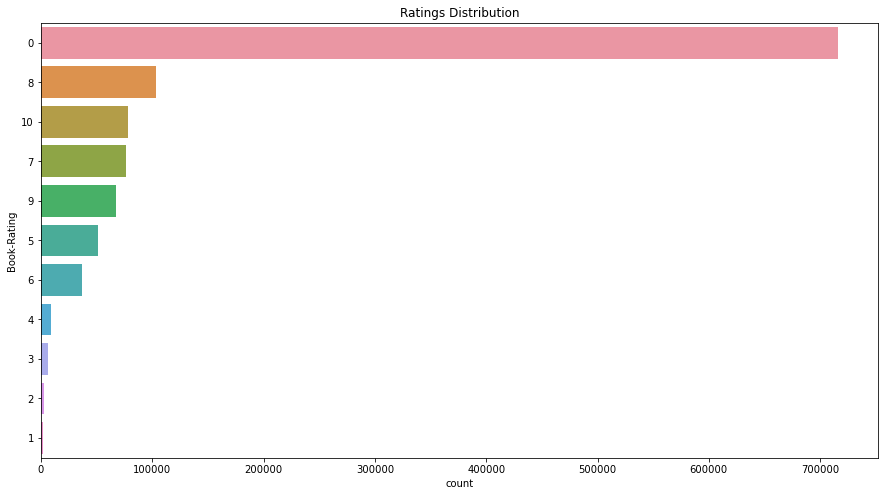

In [95]:
#checking the distribution of ratings
count_plot('Book-Rating', ratings, 'Ratings Distribution')

The ratings are unevenly distributed since majority of the ratings are 0. The ratings are either explicit, expressed on a scale of 1-10 with higher values denoting higher appreciation, or implicit, expressed by 0. Hence the need to segragate implicit and explict ratings datasets

In [96]:
#segregating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings['Book-Rating'] == 0]

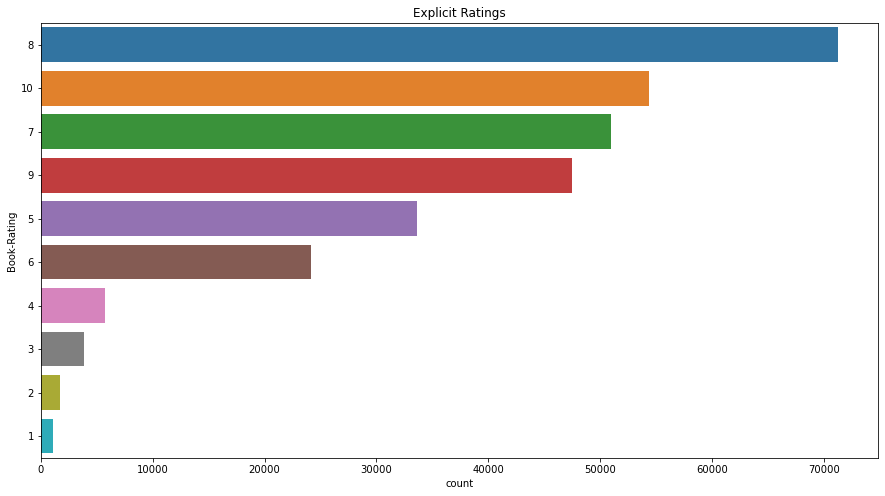

In [97]:
#plotting the explicit ratings
count_plot('Book-Rating', ratings_explicit, 'Explicit Ratings')

It can be observed that higher ratings are most common amongst users and rating 8 has been rated the highest number of times.

In [98]:
#finding the top 5 books that are rated most
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
059035342X,313


In [99]:
#discovering which book is displayed by the above ISBN numbers
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, published3, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
0,0316666343,The Lovely Bones: A Novel,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,'Alice Sebold',"The spirit of fourteen-year-old Susie Salmon describes her murder, her surprise at her new home in heaven, and her witness to her family's grief, efforts to find the killer, and attempts to come to terms with what has happened. A first novel. Reprint. 50,000 first printing.",372,Fiction,not_mature,en
1,0971880107,Wild Animus,2004,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,'Rich Shapero',"Wild animus is a search for the primordial, a test of human foundations and a journey to the breaking point.",328,Fiction,not_mature,en
2,0385504209,The Da Vinci Code,2003,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,'Dan Brown',"Harvard symbologist Robert Langdon and French cryptologist Sophie Neveu work to solve the murder of an elderly curator of the Louvre, a case which leads to clues hidden in the works of Da Vinci and a centuries-old secret society.",472,Fiction,not_mature,en
3,0312195516,The Red Tent (Bestselling Backlist),1998,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,'Anita Diamant',"Her name is Dinah. In the Bible, her life is only hinted at in a brief and violent detour within the more familiar chapters of the Book of Genesis that are about her father, Jacob, and his dozen sons. Told in Dinah's voice, this novel reveals the traditions and turmoils of ancient womanhood--the world of the red tent. It begins with the story of her mothers--Leah, Rachel, Zilpah, and Bilhah--the four wives of Jacob. They love Dinah and give her gifts that sustain her through a hard-working youth, a calling to midwifery, and a new home in a foreign land. Dinah's story reaches out from a remarkable period of early history and creates an intimate connection with the past. Deeply affecting, The Red Tent combines rich storytelling with a valuable achievement in modern fiction: a new view of biblical women's society.",336,Fiction,not_mature,en


Majority of the books that had a high rating are mainly of category fiction and are all novels. This shows that novels of type fiction are mainly preferred by users

In [100]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [101]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21


In [102]:
#merging explicit ratings to the users dataset and published2 dataset
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,published3,on='ISBN')

In [103]:
Final_Dataset.head()

,User-ID,Age,City,State,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,authors,description,page_count,categories,maturity_rating,language
0,8,32,timmins,ontario,canada,074322678X,5,5.0,1,Where You'll Find Me: And Other Stories,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,'Ann Beattie',"Now back in print, Ann Beattie's finest short story collection, reissued to accompany the publication of her latest novel, ""The Doctor's House."" Most of the characters in ""Where You'll Find Me"" grew up in the 1960s and 1970s, are in their twenties and thirties and embody a curious, yet familiar, fusion of hope and despair. In finely crafted narratives, Beattie writes of women nursing broken hearts, men looking for love, and married couples struggling to stay together.",207,Fiction,not_mature,en
1,8,32,timmins,ontario,canada,0887841740,5,5.0,1,The Middle Stories,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,'Sheila Heti',"Part Dorothy Parker, part Jose Saramago, with shades of George Orwell, Sheila Heti has arrived on Canada's literary scene a fully formed artist. Balancing wisdom and innocence, joy and foreboding, each story in The Middle Stories leads us to surprising places. A frog doles out sage advice to a plumber infatuated with a princess, a boy falls hopelessly in love with a monkey, and a man with a hat keeps apocalyptic thoughts at bay by resolving to follow a plan that he admits he won't stick to. Globe and Mail critic Russell Smith has described Heti's stories as cryptic fairy tales without morals at the end, but really the morals are in the quality of the telling and in the details disclosed along the way. Look where you weren't going to look, think what you wouldn't have thought, Heti seems to say, and meaning itself gains more meaning and more dimensions. Heti's stories are not what you expect, but why did you expect that anyway?""",144,Fiction,not_mature,en
2,8,32,timmins,ontario,canada,1575663937,6,6.0,1,More Cunning Than Man: A Social History of Rats and Man,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.THUMBZZZ.jpg,'Robert Hendrickson',"This eye-opening, well-researched examination of mankind's oldest competitor is filled with weirdly fascinating information about the history of the rat and the way it consistently outsmarts man. Illustrations.",300,Nature,not_mature,en
3,8,32,timmins,ontario,canada,1881320189,7,7.0,2,Goodbye to the Buttermilk Sky,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.THUMBZZZ.jpg,'Julia Oliver',"A beautifully narrated novel of time and place, ""Goodbye to the Buttermilk Sky"" re-creates a southern summer when the depression and the boll weevil turned hopes to dust. With the extraordinary talent to make the reader see the Ball canning jars on the kitchen table, hear the clicks on the party line, and feel the bittersweet moments of 20-year-old Callie Tatum's first experiences with adult desire, Oliver portrays a young wife's increasingly dangerous infidelity with cinematic precision and palpable suspense.",191,Fiction,not_mature,en
4,226745,38,humble,other,other,1881320189,7,7.0,2,Goodbye to the Buttermilk Sky,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.THUMBZZZ.jpg,'Julia Oliver',"A beautifully narrated novel of time and place, ""Goodbye to the Buttermilk Sky"" re-creates a southern summer when the depression and the boll weevil turned hopes to dust. With the extraordinary talent to make the reader see the Ball canning jars on the kitchen table, hear the clicks on the party line, and feel the bittersweet moments of 20-year-old Callie Tatum's first experiences with adult desire, Oliver portrays a young wife's increasingly dangerous infidelity with cinematic precision and palpable suspense.",191,Fiction,not_mature,en


In [104]:
#Instantiate the 'DescribeData' class for the 'Final_dataset' 
fd = DescribeData(Final_Dataset)

In [105]:
#checking for missing values in the combined dataset to be used for analysis
print(fd.missing)

There are a total of 0 missing values in the DataFrame.

User-ID                    0
Age                        0
City                       0
State                      0
Country                    0
ISBN                       0
Book-Rating                0
Avg_Rating                 0
Total_No_Of_Users_Rated    0
Book-Title                 0
Year-Of-Publication        0
Publisher                  0
Image-URL-S                0
authors                    0
description                0
page_count                 0
categories                 0
maturity_rating            0
language                   0
dtype: int64


### Exploratory Data Analysis

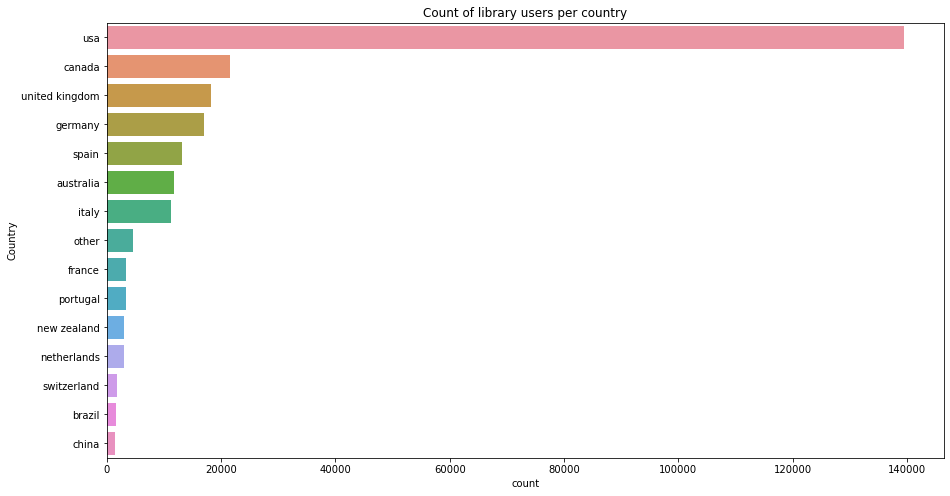

In [106]:
#plotting the count of users per country
count_plot('Country', users, 'Count of library users per country')

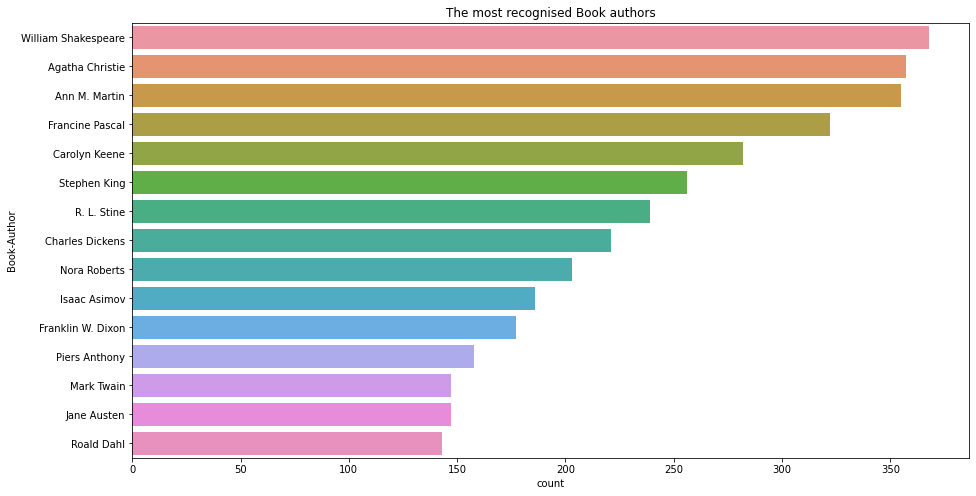

In [108]:
#plotting the most recognised book authors 
count_plot('Book-Author', published2, 'The most recognised Book authors')

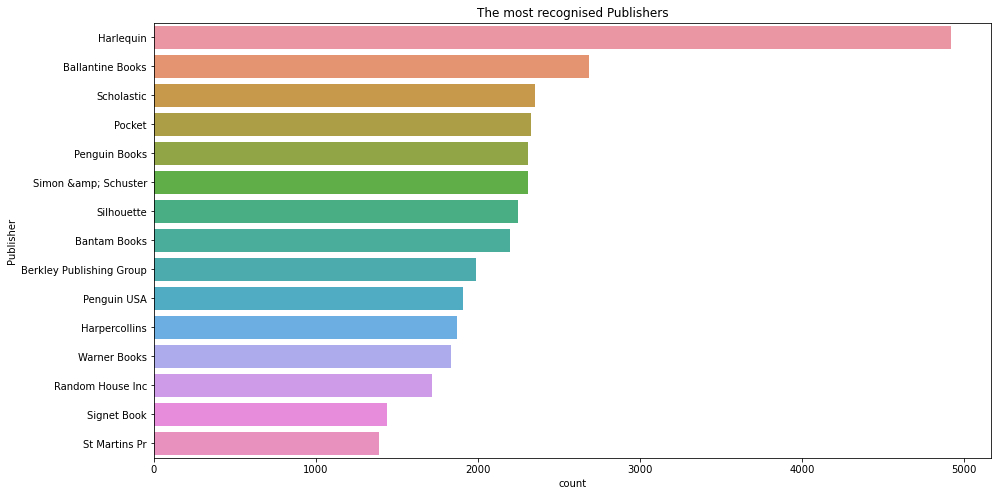

In [109]:
#plotting the most recognised publishers
count_plot('Publisher', published2, 'The most recognised Publishers')